In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from deepface import DeepFace

In [2]:
img = cv2.imread('emotion.jpg')

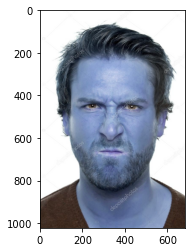

In [3]:
plt.imshow(img)

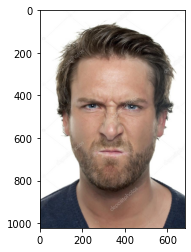

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.85s/it]


In [6]:
predictions

{'emotion': {'angry': 87.62256054609293,
  'disgust': 0.41145407346438484,
  'fear': 4.035387452198571,
  'happy': 0.03429076633023276,
  'sad': 5.831419353911953,
  'surprise': 0.10266129333465775,
  'neutral': 1.9622152194720246},
 'dominant_emotion': 'angry',
 'region': {'x': 89, 'y': 259, 'w': 499, 'h': 499},
 'age': 34,
 'gender': 'Man',
 'race': {'asian': 5.198212704726757e-06,
  'indian': 0.0011028771950805094,
  'black': 5.076992692920612e-06,
  'white': 97.05575108528137,
  'middle eastern': 2.291879616677761,
  'latino hispanic': 0.6512579042464495},
 'dominant_race': 'white'}

In [7]:
predictions["dominant_emotion"]

'angry'

In [8]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

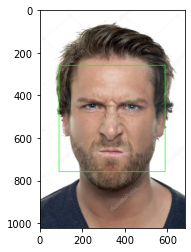

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
font = cv2.FONT_HERSHEY_SIMPLEX

# Using putText() method for putting text in video.

cv2.putText(img,
           predictions['dominant_emotion'],
           (0, 50),
           font, 3,
           (0, 0, 255),
           4,
           cv2.LINE_4);

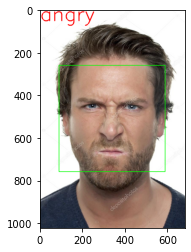

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame,actions=['emotion'])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,result['dominant_emotion'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Orginal Video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()